In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
def calc_sec(time):
    hms = time.split(':')
    hms = [float(x) for x in hms]
    sec = hms[2] + hms[1]*60 + hms[0]*3600
    sec = round(sec,3)
    return sec

In [113]:
def calc_ts(sec):
    ts = ''
    hr = int(sec/3600)
    mn = int((sec - (hr*3600))/60)
    sc = sec - (hr*3600) - (mn*60)
    sc = round(sc,3)
    ts += str(hr) + ':' + str(mn) + ':' + str(sc)
    # print(ts)
    return ts

In [114]:
def calc_t_period(dates,secs):
    t_period = []
    
    start_sec = secs[0]
    prev_sec = secs[0]
    prev_date = dates[0]

    for i in range(len(secs)):
        curr_sec = secs[i]
        diff_sec = curr_sec - prev_sec
        curr_date = dates[i]
        
        if((diff_sec>3.0) and (curr_date==prev_date)):
            t_period.append([curr_date,start_sec,prev_sec])
            start_sec = curr_sec
        elif(curr_date!=prev_date):
            t_period.append([prev_date,start_sec,prev_sec])
            start_sec = curr_sec
            prev_date = curr_date
        elif(i==len(secs)-1):
            t_period.append([curr_date,start_sec,curr_sec])

        prev_sec = curr_sec
    
    return t_period

In [115]:
def equation_bai(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    diff_std = std_i**2 - std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)
    
    diff_std_ = std_i**2

    all_std.append(diff_std)
    
    all_std = np.array(all_std)
    
    ai = np.sum(all_std**2,axis=1)/3
    ai[ai<0] = 0
    ai = np.sqrt(ai)
    
    return ai

In [116]:
std_i_bar = [0.00349329,0.00465817,0.00543154]
std_i_bar = np.array(std_i_bar)

In [239]:
rec_date = '2019-01-04'
start_time = '11:37:01'
end_time = '11:42:13'

# rec_date = '2016-01-01'
# start_time = '07:42:14'
# end_time = '07:47:01'

# rec_date = '2018-12-19'
# start_time = '16:17:05'
# end_time = '16:21:55'

In [240]:
filepath = 'SmartwatchData/raw_data/log_acc_ped.csv'
df = pd.read_csv(filepath)
filtered = [i for i in df['timestamp'] if i[:10]==rec_date and calc_sec(i[11:])>calc_sec(start_time) 
            and calc_sec(i[11:])<calc_sec(end_time)]

df_filt = df[df['timestamp'].isin(filtered)]
df_filt = df_filt.reset_index(drop=True)

cols = ['timestamp','x','y','z']
df_filt = df_filt[cols]

df_filt

,timestamp,x,y,z
0,2019-01-04 11:37:01.695,2.595315,-1.598130,8.974665
1,2019-01-04 11:37:01.854,2.394202,-1.564611,9.396045
2,2019-01-04 11:37:02.012,2.375048,-2.033874,9.396045
3,2019-01-04 11:37:02.172,1.929727,-1.665167,9.496601
4,2019-01-04 11:37:02.334,1.948880,-1.588553,9.463082
5,2019-01-04 11:37:02.493,1.824382,-1.511938,9.534908
6,2019-01-04 11:37:02.656,1.781286,-1.080982,9.491813
7,2019-01-04 11:37:02.817,1.800440,-1.100136,9.640253
8,2019-01-04 11:37:02.975,1.848324,-1.243788,9.692925
9,2019-01-04 11:37:03.136,1.833958,-1.200692,9.678560


In [241]:
cols = df_filt.columns.tolist()

row_len = len(df_filt.index)

dates = [df_filt.iloc[i,0].split(' ')[0] for i in range(row_len)]
secs = [calc_sec(df_filt.iloc[i,0].split(' ')[1]) for i in range(row_len)]

period = calc_t_period(dates,secs)

ts = []
for elem in period:
    ts.append([elem[0],calc_ts(elem[1]),calc_ts(elem[2])])
    
ts = np.array(ts)
print(ts)

[['2019-01-04' '11:37:1.695' '11:42:12.762']]


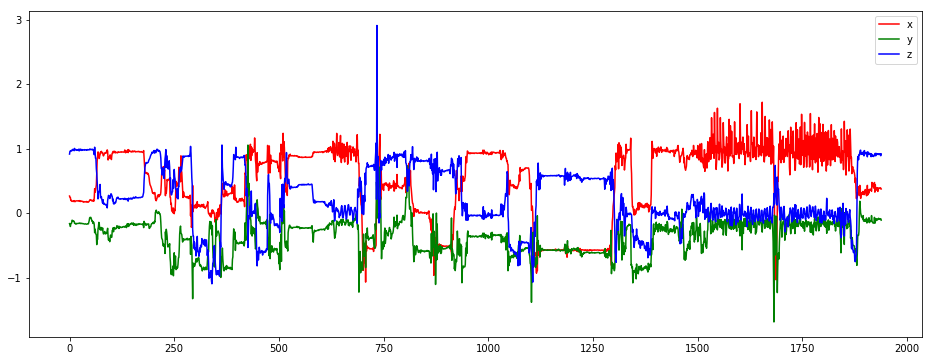

In [242]:
ts1 = [i for i in df_filt['timestamp'] if calc_sec(i[11:])<=calc_sec(ts[0][2])]
df1 = df_filt[df_filt['timestamp'].isin(ts1)]

g = 9.8
df1.loc[:,'x'] = df1['x'].apply(lambda x: x/g)
df1.loc[:,'y'] = df1['y'].apply(lambda x: x/g)
df1.loc[:,'z'] = df1['z'].apply(lambda x: x/g)

plotted = df1.plot(color=('r','g','b'),figsize=(16,6)).legend(loc='upper right')

fig = plotted.get_figure()
# fig.savefig('testrun_indy_RH_acc_19-12-18.png')

In [243]:
H = 10
ai1 = []

for i in range(len(df1)):
    xyz_val = []
    if(i-H>=0):
        for j in range(H,0,-1):
            xyz_val.append([df1.iloc[i-j,1],df1.iloc[i-j,2],df1.iloc[i-j,3]])
        ai_val = float(equation_bai(xyz_val))
        ai1.append(ai_val)

In [244]:
df1['AI'] = pd.Series(ai1)

df1

,timestamp,x,y,z,AI
0,2019-01-04 11:37:01.695,0.264828,-0.163074,0.915782,1.000654
1,2019-01-04 11:37:01.854,0.244306,-0.159654,0.958780,1.000459
2,2019-01-04 11:37:02.012,0.242352,-0.207538,0.958780,1.000376
3,2019-01-04 11:37:02.172,0.196911,-0.169915,0.969041,1.000160
4,2019-01-04 11:37:02.334,0.198865,-0.162097,0.965621,1.000137
5,2019-01-04 11:37:02.493,0.186161,-0.154279,0.972950,1.000122
6,2019-01-04 11:37:02.656,0.181764,-0.110304,0.968552,1.000149
7,2019-01-04 11:37:02.817,0.183718,-0.112259,0.983699,1.000125
8,2019-01-04 11:37:02.975,0.188604,-0.126917,0.989074,1.000103
9,2019-01-04 11:37:03.136,0.187139,-0.122520,0.987608,1.000091


In [245]:
ts_ = []
labels = []

with open('times5.txt','r') as f:
    for line in f:
        t = line.strip('\n').split('\t')
        ts_.append(float(t[0]))
        labels.append(t[1])

accum = 0
ts = []
for x in ts_:
    accum += x
    ts.append(round(accum,2))

lb_set = set()
for x in labels:
    lb_set.add(x)

lb_ = list(lb_set)

set_cnt = []
for i in range(len(lb_)):
    set_cnt.append(0)

lb = []
lb.append('NaN')

for x in labels:
    for i in range(len(lb_)):
        if(lb_[i]==x and set_cnt[i]!=1 and lb_[i]!='NaN'):
            set_cnt[i] = 1
            lb.append(x)

colors = ['#808080', '#E6194B', '#3CB44B', '#FFE119', '#4363D8', '#F58231',
          '#911EB4', '#46F0F0', '#F032E6', '#BCF60C', '#008080', '#E6BEFF', 
          '#9A6324', '#800000', '#AAFFC3', '#808000', '#000075']

color_dict = {}
for i in range(len(lb)):
    color_dict[lb[i]] = colors[i]
    
print(color_dict)

lb_color = []
for x in labels:
    lb_color.append(color_dict[x])

print(lb_color)
print(len(lb_color))
print(ts)

{'NaN': '#808080', 'stand': '#E6194B', 'sit': '#3CB44B', 'lay down': '#FFE119', 'walk': '#4363D8'}
['#E6194B', '#3CB44B', '#E6194B', '#808080', '#FFE119', '#3CB44B', '#FFE119', '#E6194B', '#808080', '#4363D8', '#808080']
11
[29.58, 61.29, 93.0, 103.95, 140.03, 170.77, 202.72, 233.83, 244.99, 292.05, 311.07]


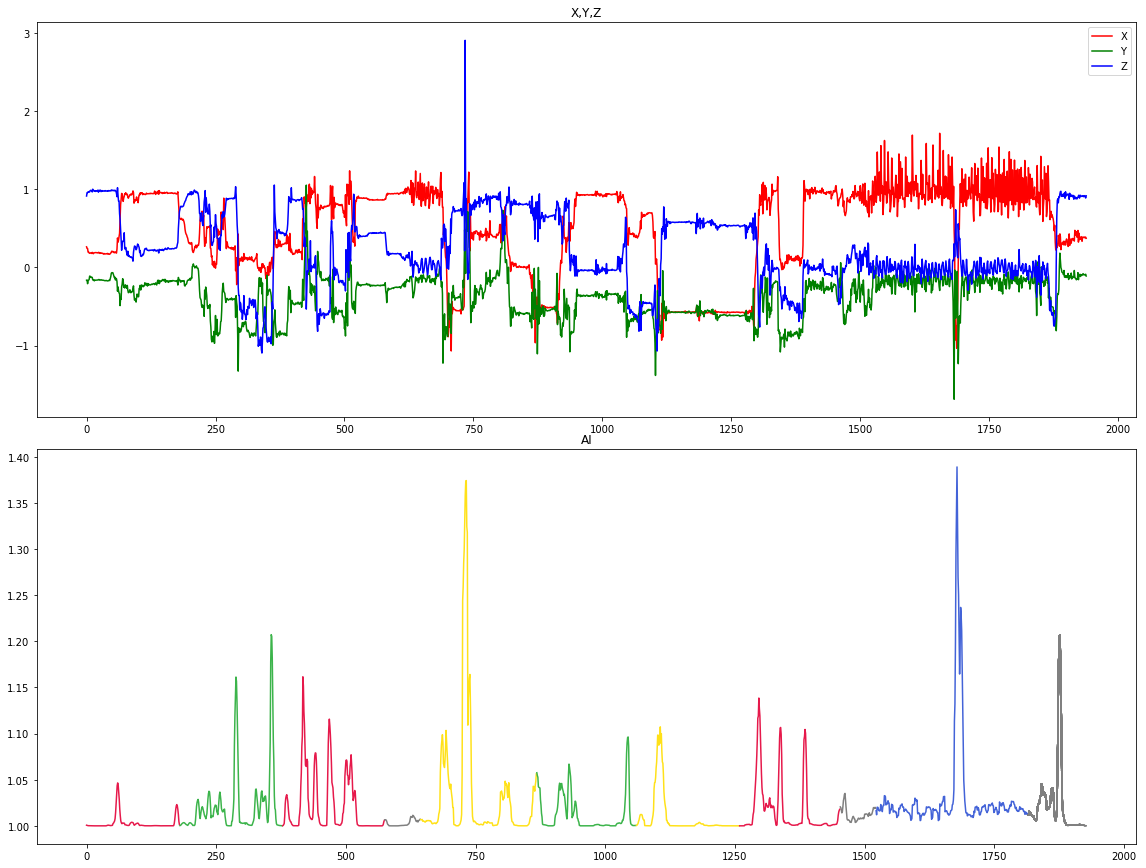

<Figure size 1080x3600 with 0 Axes>

In [246]:
dict1 = df1.to_dict(orient='list')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,12))
fig.tight_layout()

ts_cnt = 0
x_axis = []
y_ai = []

ax = axes[0]
ax.plot(dict1['x'],color='r',label='X')
ax.plot(dict1['y'],color='g',label='Y')
ax.plot(dict1['z'],color='b',label='Z')
ax.legend(loc='upper right')
ax.set_title('X,Y,Z')

ax = axes[1]
for i in range(len(dict1['timestamp'])):
    if(dict1['AI'][i]>0):
        if(calc_sec(dict1['timestamp'][i].split(' ')[1])>calc_sec(start_time)+ts[ts_cnt]):
            ax.plot(x_axis,y_ai,color=lb_color[ts_cnt])
            ts_cnt += 1
            x_axis = []
            y_ai = []
            
        elif(ts_cnt==len(lb_color)-1):
            ax.plot(x_axis,y_ai,color=lb_color[ts_cnt])
            
        
        x_axis.append(i)
        y_ai.append(dict1['AI'][i])
    
ax.set_title('AI')
plt.figure(figsize=(15,50))
# fig.savefig('testrun_ped_lh.png', dpi = 300)

plt.show()

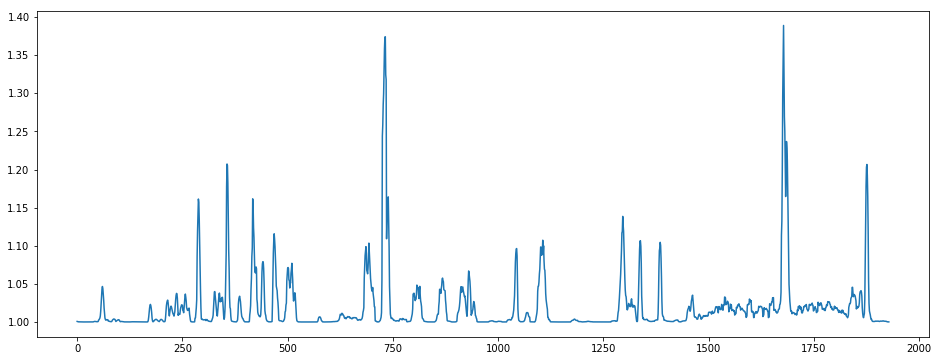

In [247]:
fig = plt.figure(figsize=(16,6))
plt.plot(ai1)
# plt.ylim(top=1.6)
plt.show()

# fig.savefig('testrun_indy_LH_AI.png')

In [248]:
df1['AI'] = pd.Series(ai1)

# df1.to_csv('SmartwatchData/raw_data/test_acc_indy_lh.csv')
df1

,timestamp,x,y,z,AI
0,2019-01-04 11:37:01.695,0.264828,-0.163074,0.915782,1.000654
1,2019-01-04 11:37:01.854,0.244306,-0.159654,0.958780,1.000459
2,2019-01-04 11:37:02.012,0.242352,-0.207538,0.958780,1.000376
3,2019-01-04 11:37:02.172,0.196911,-0.169915,0.969041,1.000160
4,2019-01-04 11:37:02.334,0.198865,-0.162097,0.965621,1.000137
5,2019-01-04 11:37:02.493,0.186161,-0.154279,0.972950,1.000122
6,2019-01-04 11:37:02.656,0.181764,-0.110304,0.968552,1.000149
7,2019-01-04 11:37:02.817,0.183718,-0.112259,0.983699,1.000125
8,2019-01-04 11:37:02.975,0.188604,-0.126917,0.989074,1.000103
9,2019-01-04 11:37:03.136,0.187139,-0.122520,0.987608,1.000091


In [249]:
import pywt
from pywt import wavedec

In [250]:
(cA, cD) = pywt.dwt(ai1,'db3')
coeffs = wavedec(ai1,'db3',level=3)
cA3, cD3, cD2, cD1 = coeffs

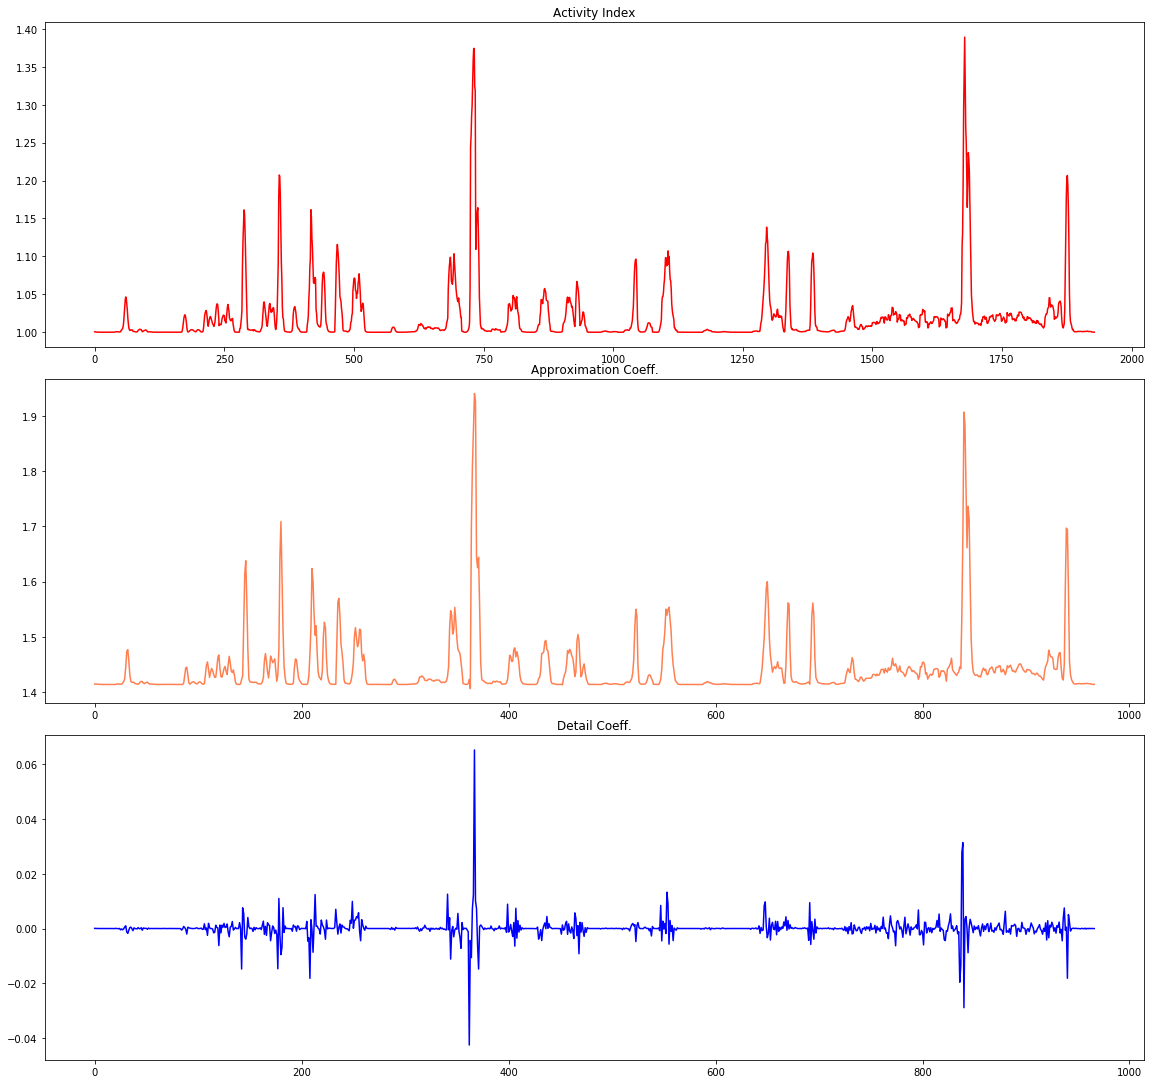

In [251]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,15))
fig.tight_layout()

ax = axes[0]
ax.plot(ai1,'r')
ax.set_title('Activity Index')

ax = axes[1]
ax.plot(cA,'#FF7F50')
ax.set_title('Approximation Coeff.')

ax = axes[2]
ax.plot(cD,'b')
ax.set_title('Detail Coeff.')

plt.show()
# fig.savefig('testrun_indy_lh_wavelet.png',dpi=300)

In [252]:
a1 = np.array(ai1)
N = a1.shape[0]
# t = np.arange(120)
# a1 = np.sin(t) + np.sin(2*t)

T = 0.16
x = np.linspace(1/(T*(N-1)), 1/T, N-1)

ft = np.fft.fft(a1)

print(ft)
print(ft.real[1:].shape)
print(ft.imag)

print(x.shape)
print(a1.shape)

[ 1.96631356e+03+0.j          1.01540230e+00-1.55733123j
 -3.24965011e+00+8.38168546j ... -3.49747954e+00-3.01809481j
 -3.24965011e+00-8.38168546j  1.01540230e+00+1.55733123j]
(1928,)
[ 0.         -1.55733123  8.38168546 ... -3.01809481 -8.38168546
  1.55733123]
(1928,)
(1929,)


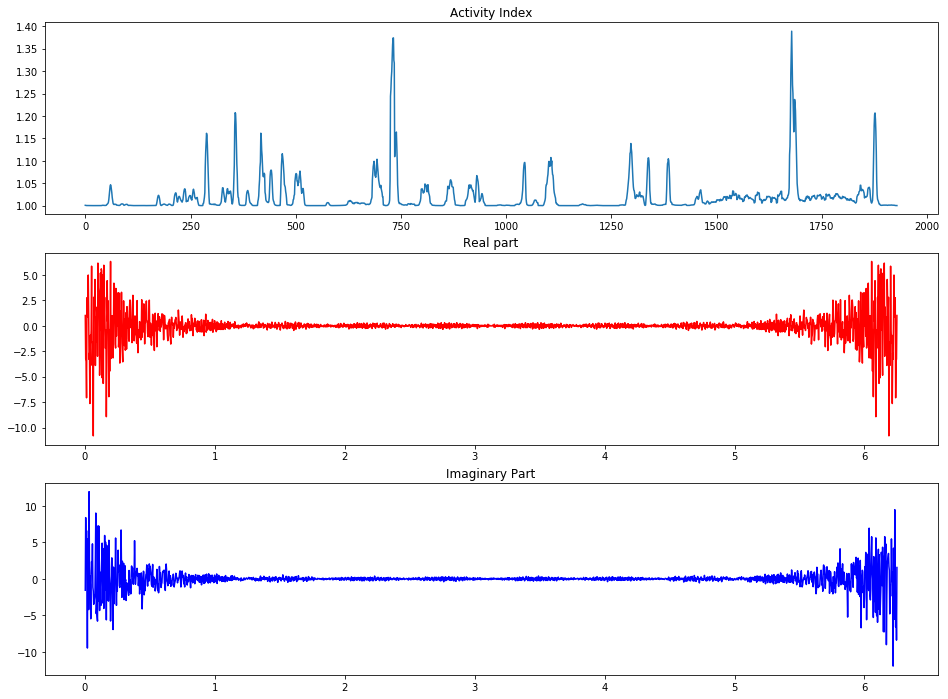

In [253]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,12))

ax = axes[0]
ax.plot(a1)
ax.set_title('Activity Index')

ax = axes[1]
ax.plot(x,ft.real[1:],'r')
# ax.set_ylim(top=15,bottom=-15)
ax.set_title('Real part')

ax = axes[2]
ax.plot(x,ft.imag[1:],'b')
ax.set_title('Imaginary Part')

plt.show()
# fig.savefig('testrun_indy_lh_fft.png',dpi=300)

In [254]:
ift = np.fft.ifft(ft)
print(ift.real)
print(a1)

[1.00065446 1.00045862 1.00037633 ... 1.00009195 1.00008982 1.00007688]
[1.00065446 1.00045862 1.00037633 ... 1.00009195 1.00008982 1.00007688]


In [ ]:
for i in range(0,len(a1)-1):
    for j in range(1,len(a1)):
        

In [267]:
sub_arr_1 = a1[250:500]
std1 = np.std(sub_arr_1)

sub_arr_2 = a1[0:150]
std2 = np.std(sub_arr_2)

sub_arr_3 = a1[1300:1600]
std3 = np.std(sub_arr_3)

print(std1,std2,std3)

0.04084344987442935 0.008056297150080625 0.019220572375391
